In [1]:
import numpy as np
import pandas as pd

In [2]:
pd.set_option("display.max_columns", None)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = "/content/drive/MyDrive/Deloitte Backup/Financial Data Clustering Paper/"

In [19]:
ced.columns

Index(['OrgId', 'FisYear', 'Id_A4', 'OrgName', 'BusTRBCId',
       'Emission Reduction Processes/Policy Emissions Reduction',
       'Emission Reduction Objectives/Targets Emissions Reduction',
       'derivedEmissions', 'CO2 Equivalents Emission Total',
       'CO2 Equivalents Emission Direct', 'CO2 Equivalents Emission Indirect',
       'emissionIntensity', 'Environmental Expenditures',
       'Environmental Provisions', 'CO2e Indirect Emissions, Scope 3',
       'Environmental R&D Expenditures', 'Energy Use Total',
       'Direct Energy/Energy Purchased Direct',
       'Direct Energy/Energy Produced Direct', 'Indirect Energy Use',
       'ESG SCORE', 'ESG Combined Score', 'ESG Controversies Score',
       'Resource Use Score', 'Emissions Score',
       'Environmental Innovation Score', 'Workforce Score',
       'Human Rights Score', 'Community Score', 'Product Responsibility Score',
       'Management Score', 'Shareholders Score', 'CSR Strategy Score',
       'totalRevenue', 'totalA

In [ ]:
ced.groupby("FisYear")["OrgId"].nunique()

In [ ]:
ced.pivot_table(index = "FisYear", aggfunc = "count")

In [12]:
es600 = pd.read_csv(f"{path}Copy of 230330_STOXX600_constituents_companyList_mapped.csv")
es600 = es600[["OrgId","OrgName","FisYear"]]

In [14]:
cl = pd.read_excel(f"{path}221206_company_list.xlsx")

In [15]:
cl_econ = cl[["OrgId","econId","econIdDesc"]]

In [16]:
#merging es600 portfolio constituents and carbon exposure data
es600 = pd.merge( left = es600,
                  right = ced,
                  how = "left",
                  on = ["OrgId","FisYear"])

In [17]:
#merging es600 portfolio constituents and econId from companyList
es600 = pd.merge(left = cl_econ,
                 right = es600,
                 how = "right",
                 on = ["OrgId"])

In [18]:
pd.pivot_table(data = es600[["OrgId","FisYear"]], index = "FisYear", values = "OrgId", aggfunc = "count")

,OrgId
FisYear,
2009,600
2010,600
2011,600
2012,600
2013,600
2014,601
2015,600
2016,600
2017,600


In [20]:
es600.to_csv("230507_es600_final.csv", index = False)

In [21]:
es600.columns

Index(['OrgId', 'econId', 'econIdDesc', 'OrgName_x', 'FisYear', 'Id_A4',
       'OrgName_y', 'BusTRBCId',
       'Emission Reduction Processes/Policy Emissions Reduction',
       'Emission Reduction Objectives/Targets Emissions Reduction',
       'derivedEmissions', 'CO2 Equivalents Emission Total',
       'CO2 Equivalents Emission Direct', 'CO2 Equivalents Emission Indirect',
       'emissionIntensity', 'Environmental Expenditures',
       'Environmental Provisions', 'CO2e Indirect Emissions, Scope 3',
       'Environmental R&D Expenditures', 'Energy Use Total',
       'Direct Energy/Energy Purchased Direct',
       'Direct Energy/Energy Produced Direct', 'Indirect Energy Use',
       'ESG SCORE', 'ESG Combined Score', 'ESG Controversies Score',
       'Resource Use Score', 'Emissions Score',
       'Environmental Innovation Score', 'Workforce Score',
       'Human Rights Score', 'Community Score', 'Product Responsibility Score',
       'Management Score', 'Shareholders Score', 'CSR S

In [22]:
es600 = pd.read_csv(f"{path}230507_es600_final.csv")

In [23]:
es600 = es600.replace([np.inf, -np.inf], np.nan)

In [24]:
es600.columns[10:20]

Index(['derivedEmissions', 'CO2 Equivalents Emission Total',
       'CO2 Equivalents Emission Direct', 'CO2 Equivalents Emission Indirect',
       'emissionIntensity', 'Environmental Expenditures',
       'Environmental Provisions', 'CO2e Indirect Emissions, Scope 3',
       'Environmental R&D Expenditures', 'Energy Use Total'],
      dtype='object')

In [25]:
es600[["FisYear","emissionIntensity"]].describe()

,FisYear,emissionIntensity
count,7801.000000,6232.000000
mean,2014.999872,200.528448
std,3.741675,674.210516
min,2009.000000,0.001962
25%,2012.000000,6.736099
50%,2015.000000,23.221506
75%,2018.000000,86.436145
max,2021.000000,15036.691011


In [26]:
grouped.describe().columns

NameError: name 'grouped' is not defined

# STOXX 600 Index Price Plot

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

In [40]:
es600_prices = pd.read_csv(f"{path}230509_STOXX600_prices_2004_2023.csv", parse_dates = ["Date"])

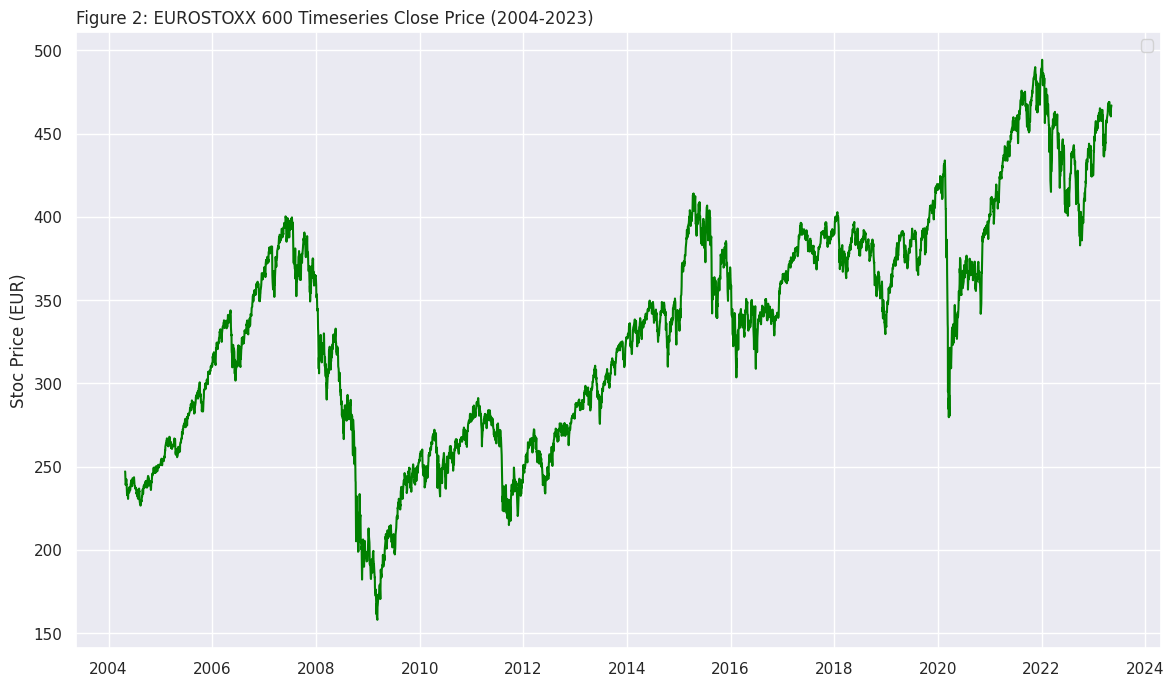

In [41]:


sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=es600_prices, x ='Date', y = 'Close',
                  #hue='Volume',
                  c = "green",
                  legend='full', lw=1.5)

plt.legend(bbox_to_anchor=(1, 1))
plt.ylabel('Stoc Price (EUR)')
plt.xlabel("")
plt.title("Figure 2: EUROSTOXX 600 Timeseries Close Price (2004-2023)", loc = "left")
plt.show()

# ESG Score and derivedEmissions and emissionIntensity Count

In [ ]:
data = es600.loc[es600.FisYear.isin([2015,2016,2017,2018,2019,2020,2021])]

In [ ]:
data[["derivedEmissions","ESG SCORE", "emissionIntensity"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4200 entries, 1800 to 7800
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   derivedEmissions   3544 non-null   float64
 1   ESG SCORE          3830 non-null   float64
 2   emissionIntensity  3543 non-null   float64
dtypes: float64(3)
memory usage: 131.2 KB


In [ ]:
len(data.OrgId.unique())

818

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4200 entries, 1800 to 7800
Data columns (total 70 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   OrgId                                                      4200 non-null   float64
 1   econId                                                     3992 non-null   float64
 2   econIdDesc                                                 3992 non-null   object 
 3   OrgName_x                                                  4200 non-null   object 
 4   FisYear                                                    4200 non-null   int64  
 5   Id_A4                                                      3831 non-null   object 
 6   OrgName_y                                                  3831 non-null   object 
 7   BusTRBCId                                                  3831 non-null   float64
 8   Emiss

In [ ]:
data.dtypes.value_counts()

float64    62
object      7
int64       1
dtype: int64

# Carbon Intensity Descriptive Statistics Table

In [30]:
years = [2015,2016,2017,2018,2019,2020,2021]
grouped = es600.loc[es600.FisYear.isin(years), ["FisYear","emissionIntensity"]].groupby("FisYear")

ei_stat = grouped.describe()
ei_stat.columns = [column_name[1].capitalize() for column_name in ei_stat.columns.values]

skew = grouped.skew().rename(columns = {"emissionIntensity":"Skew"})
med = grouped.median().rename(columns = {"emissionIntensity":"Med"})

ei_stat = pd.concat([ei_stat.iloc[:,:2],med,ei_stat.iloc[:,2:]], axis = 1)
ei_stat = ei_stat.round(decimals = 2)

In [31]:
ei_stat = ei_stat.drop(columns = ["25%","50%","75%"])
ei_stat

,Count,Mean,Med,Std,Min,Max
FisYear,,,,,,
2015,493.0,191.11,25.09,620.18,0.02,6840.65
2016,507.0,204.54,24.82,624.03,0.02,7433.79
2017,510.0,188.83,23.78,570.49,0.01,6615.25
2018,519.0,170.70,22.08,556.55,0.01,8165.81
2019,532.0,152.34,18.96,493.86,0.02,6550.81
2020,539.0,141.45,16.21,441.82,0.02,4475.85
2021,443.0,121.92,13.51,381.01,0.01,4284.21


In [32]:
print(ei_stat.to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} &  Count &    Mean &    Med &     Std &   Min &      Max \\
FisYear &        &         &        &         &       &          \\
\midrule
2015    &  493.0 &  191.11 &  25.09 &  620.18 &  0.02 &  6840.65 \\
2016    &  507.0 &  204.54 &  24.82 &  624.03 &  0.02 &  7433.79 \\
2017    &  510.0 &  188.83 &  23.78 &  570.49 &  0.01 &  6615.25 \\
2018    &  519.0 &  170.70 &  22.08 &  556.55 &  0.01 &  8165.81 \\
2019    &  532.0 &  152.34 &  18.96 &  493.86 &  0.02 &  6550.81 \\
2020    &  539.0 &  141.45 &  16.21 &  441.82 &  0.02 &  4475.85 \\
2021    &  443.0 &  121.92 &  13.51 &  381.01 &  0.01 &  4284.21 \\
\bottomrule
\end{tabular}



<ipython-input-32-c519e4ec67b8>:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(ei_stat.to_latex())


# Box Plots of econId Sector (EI/DE)

<ipython-input-43-3e385bc8a26d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = es600["econIdDesc"], y = es600["derivedEmissions"], ax = ax1, palette = "Set2")
<ipython-input-43-3e385bc8a26d>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = es600["econIdDesc"], y = es600["emissionIntensity"], ax = ax2, palette = "Set2")


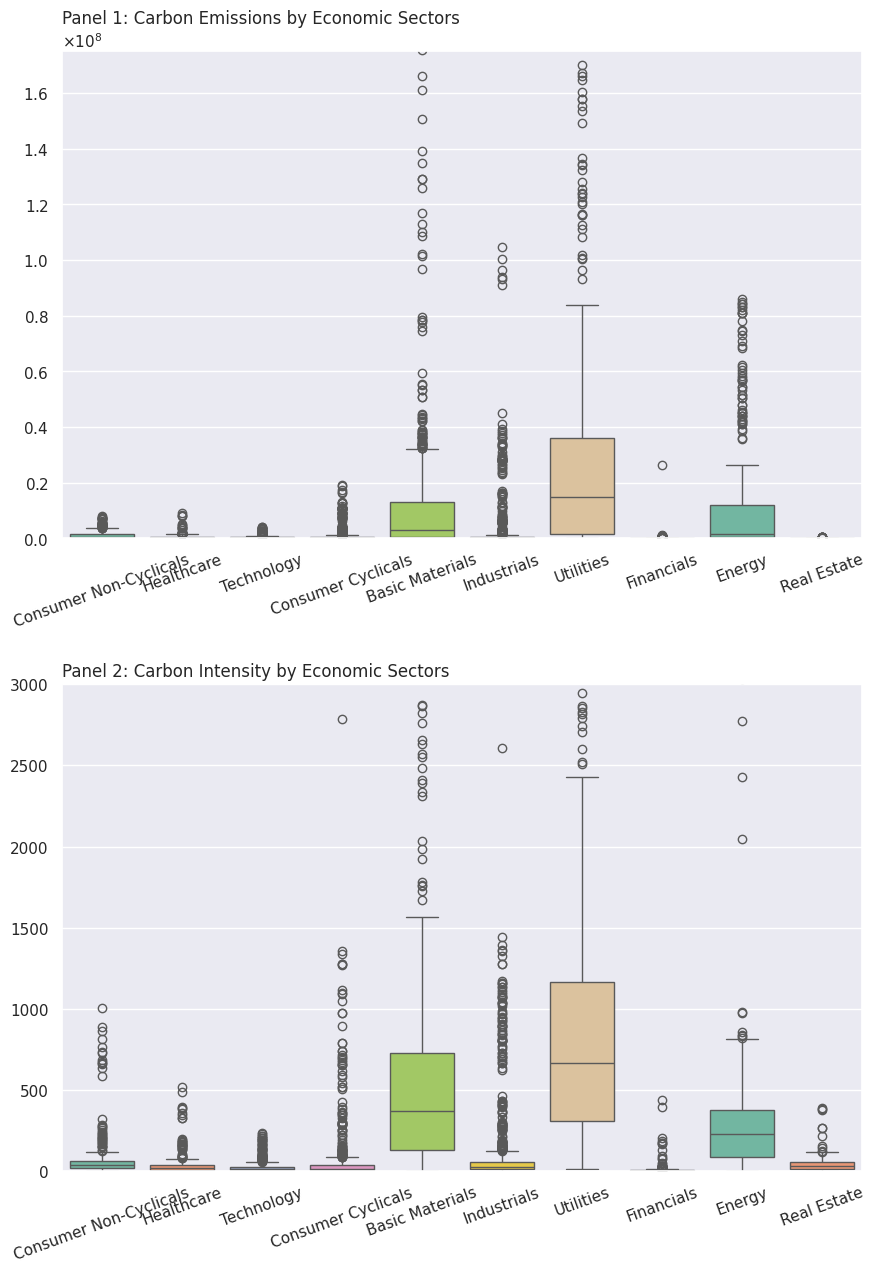

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,14))

ax1 = fig.add_subplot(2,1,1)
sns.boxplot(x = es600["econIdDesc"], y = es600["derivedEmissions"], ax = ax1, palette = "Set2")
ax1.set_ylabel("")
ax1.set_xlabel("")
ax1.set_ylim([0,175000000])
ax1.set_title("Panel 1: Carbon Emissions by Economic Sectors", loc = "left")
ax1.ticklabel_format(axis='y', style='plain')
ax1.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))


ax2 = fig.add_subplot(2,1,2)
sns.boxplot(x = es600["econIdDesc"], y = es600["emissionIntensity"], ax = ax2, palette = "Set2")
ax2.set_ylabel("")
ax2.set_xlabel("")
ax2.set_ylim([0,3000])
ax2.set_title("Panel 2: Carbon Intensity by Economic Sectors", loc = "left")

plt.setp(ax1.xaxis.get_majorticklabels(), rotation=20)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=20)

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    hspace = 0.3)

plt.savefig('boxplots_ei_de_econId_secotrs.pdf')

plt.show()

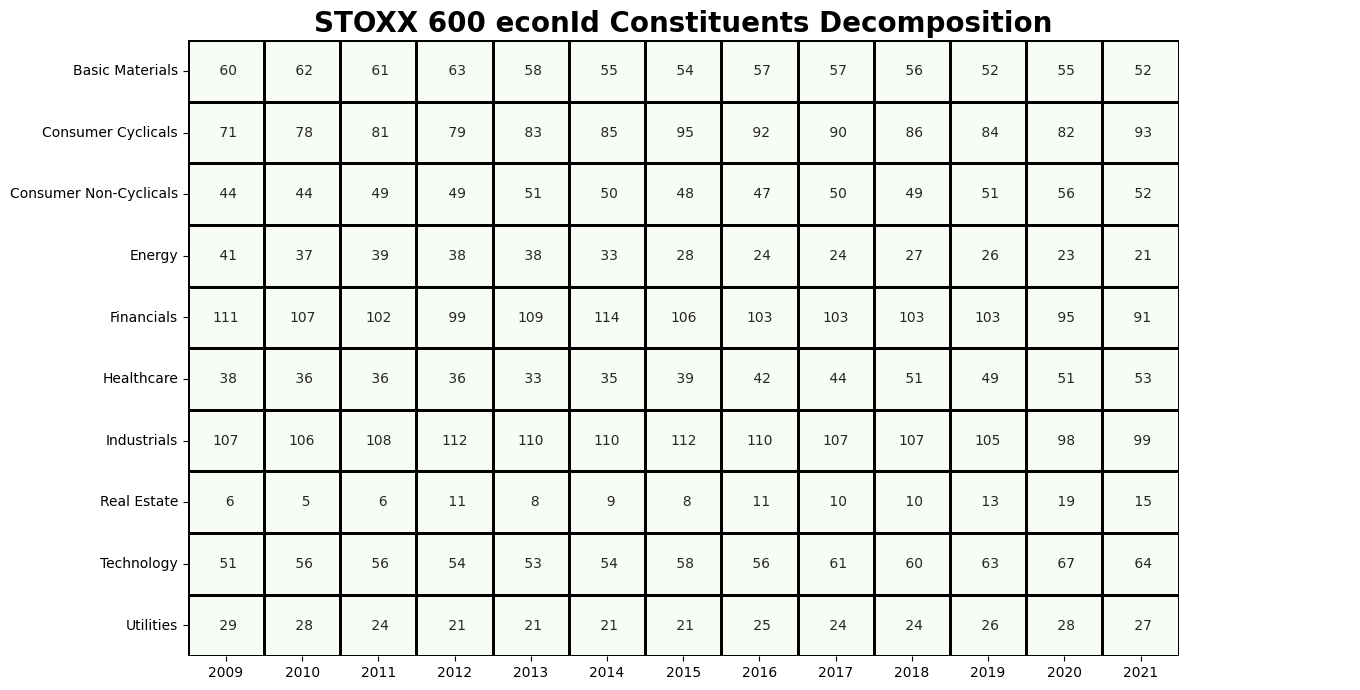

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

fig = plt.figure(figsize = (15,8))
gs = fig.add_gridspec(ncols=2, nrows=1, width_ratios=[15, 1])


pivot = pd.pivot_table(es600[["FisYear","econIdDesc","OrgId"]], index = "econIdDesc", columns = "FisYear", values = "OrgId", aggfunc = "count")
h = pd.DataFrame(np.zeros(130).reshape(10,13), index = pivot.index, columns = pivot.columns)
text = np.array(pivot)

ax = fig.add_subplot(gs[0])

sns.heatmap(data = h, cmap = "Greens", ax = ax, annot = text, fmt = '3.0f', cbar = False, linewidth = 2, linecolor = "black")
ax.set_ylabel("")
ax.set_xlabel("")
ax.set_title("STOXX 600 econId Constituents Decomposition", fontsize = 20, fontweight = "bold")

ax = fig.add_subplot(gs[1])
ax.axis("off")
#fig.suptitle("STOXX 600 econId Constituents Decomposition", fontsize = 20, fontweight = "bold")
plt.show()

In [ ]:
len(es600.Region.unique())

6

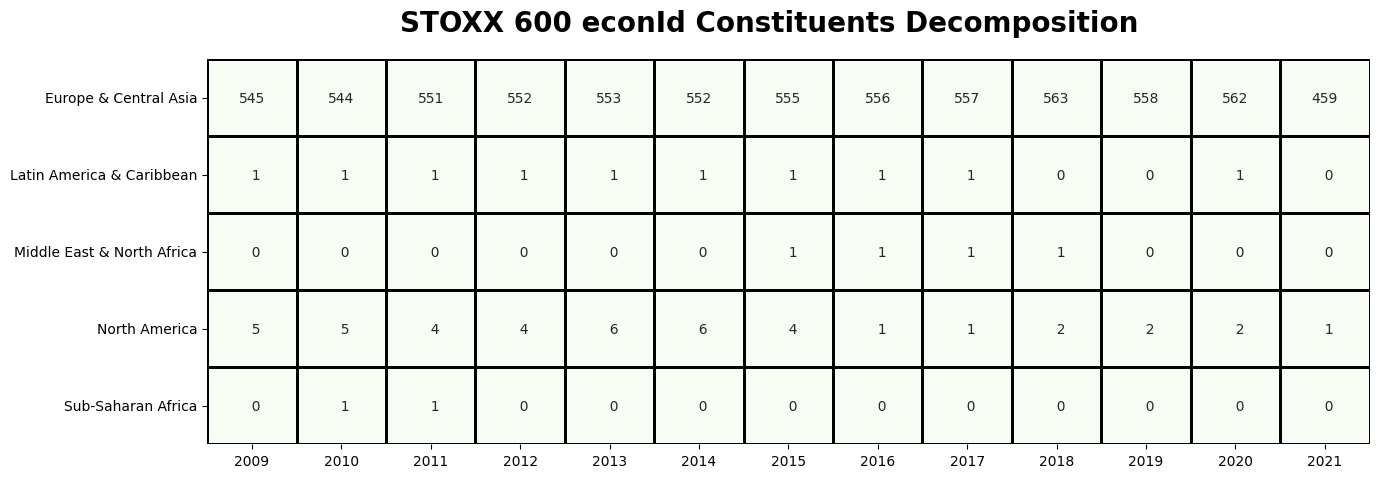

In [ ]:
fig = plt.figure(figsize = (15,5))

pivot = pd.pivot_table(es600[["FisYear","Region","OrgId"]], index = "Region", columns = "FisYear", values = "OrgId", aggfunc = "count").fillna(0)
h = pd.DataFrame(np.zeros(65).reshape(5,13), index = pivot.index, columns = pivot.columns)

text = np.array(pivot)

ax = fig.add_subplot(1,1,1)

sns.heatmap(data = h, cmap = "Greens", ax = ax, annot = text, fmt = '3.0f', cbar = False, linewidth = 2, linecolor = "black")
ax.set_ylabel("")
ax.set_xlabel("")
fig.suptitle("STOXX 600 econId Constituents Decomposition", fontsize = 20, fontweight = "bold")
plt.show()

In [ ]:
es600.econIdDesc.sort_values().unique()

array(['Basic Materials', 'Consumer Cyclicals', 'Consumer Non-Cyclicals',
       'Energy', 'Financials', 'Healthcare', 'Industrials', 'Real Estate',
       'Technology', 'Utilities', nan], dtype=object)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

es600_minmax =

In [ ]:
def plot_df_variables(data: pd.DataFrame, variables: list, aggfunc: str, title:str):

  fig = plt.figure(figsize = (17,14))
  fig.suptitle(title, y = 1, fontsize = 20, fontweight = "bold")

  n_year = len(data.FisYear.unique())
  n_variables = len(variables)
  n_plot = 1

  for variable in variables:

    pivot = pd.pivot_table(data = es600[["FisYear",variable]],
                             index = "FisYear",
                             values = variable,
                             aggfunc = aggfunc)

    ax = fig.add_subplot(n_variables//3 + 1,3,n_plot)
    pivot.plot(ax = ax)
    ax.set_title(variable, fontsize = 10, fontweight = "bold")
    ax.legend(loc = "upper right")

    n_plot += 1

  plt.tight_layout()
  plt.show()

  return

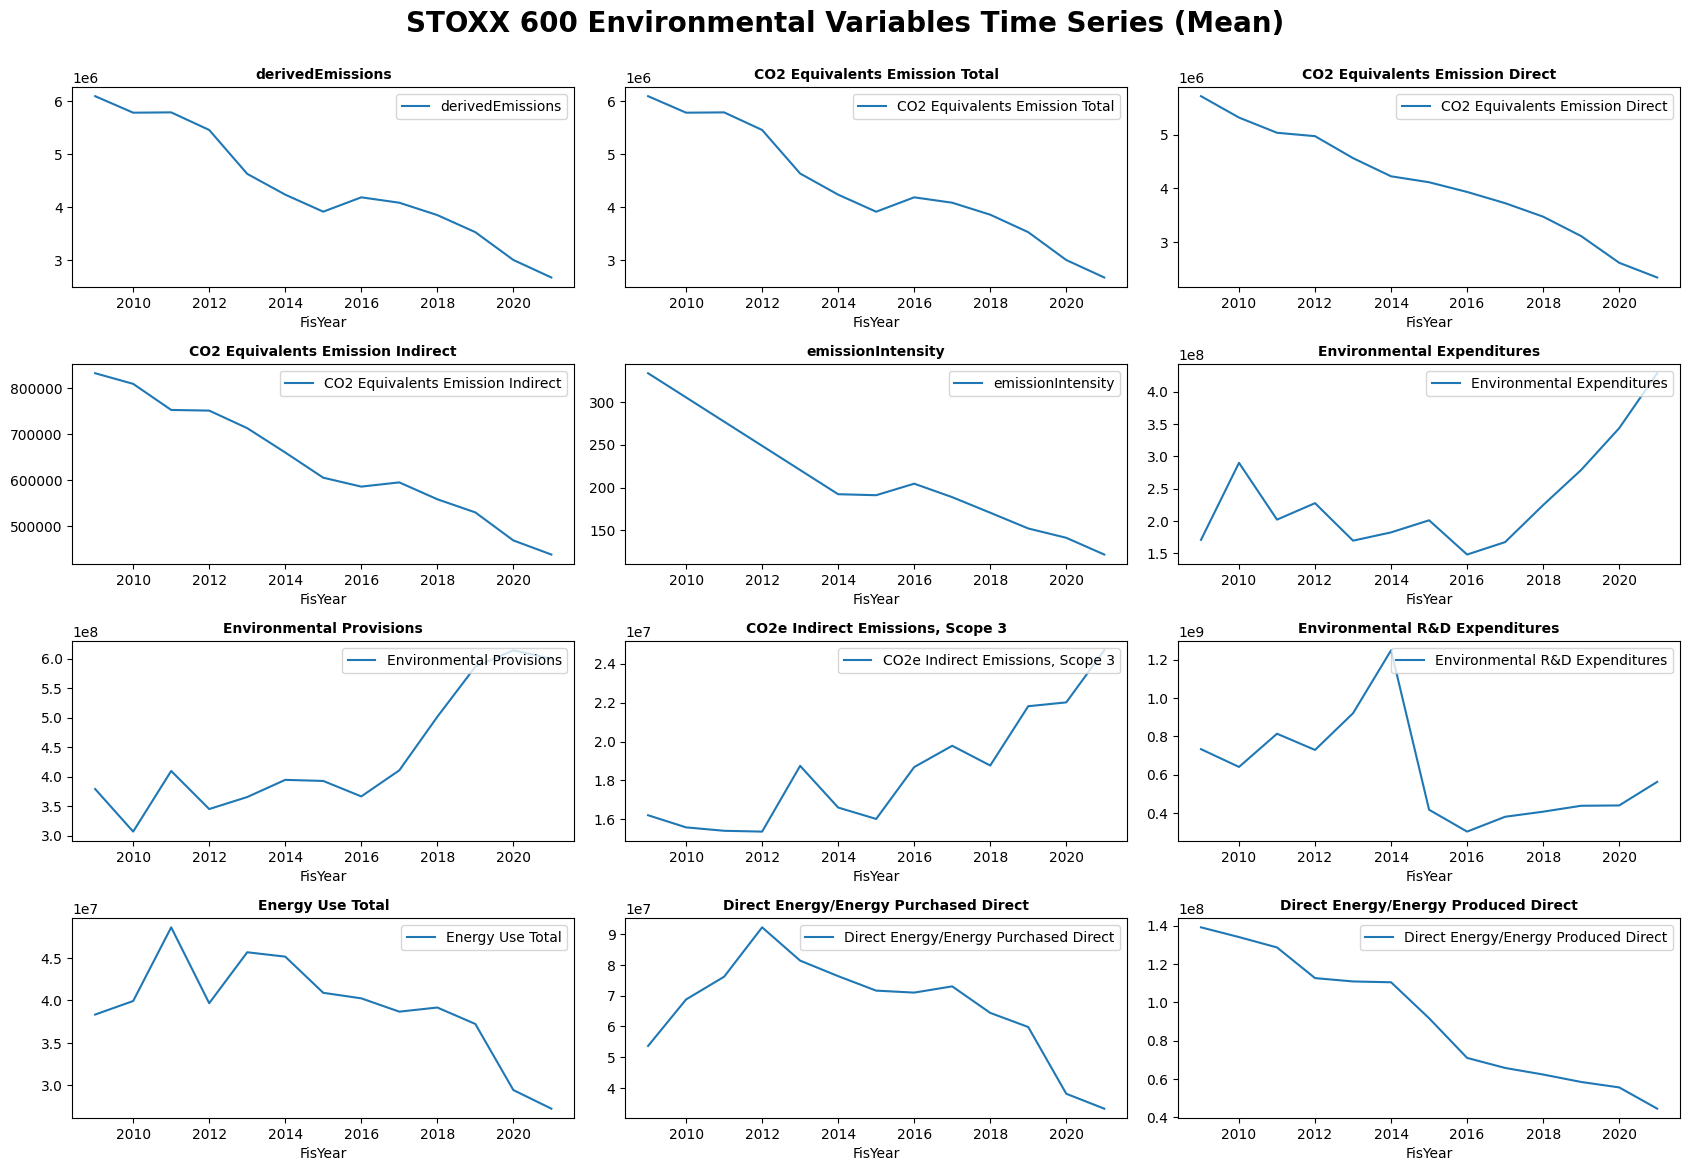

In [ ]:
plot_df_variables(data = es600  .copy(),variables = es600.columns[10:22], aggfunc = "mean", title = "STOXX 600 Environmental Variables Time Series (Mean)")

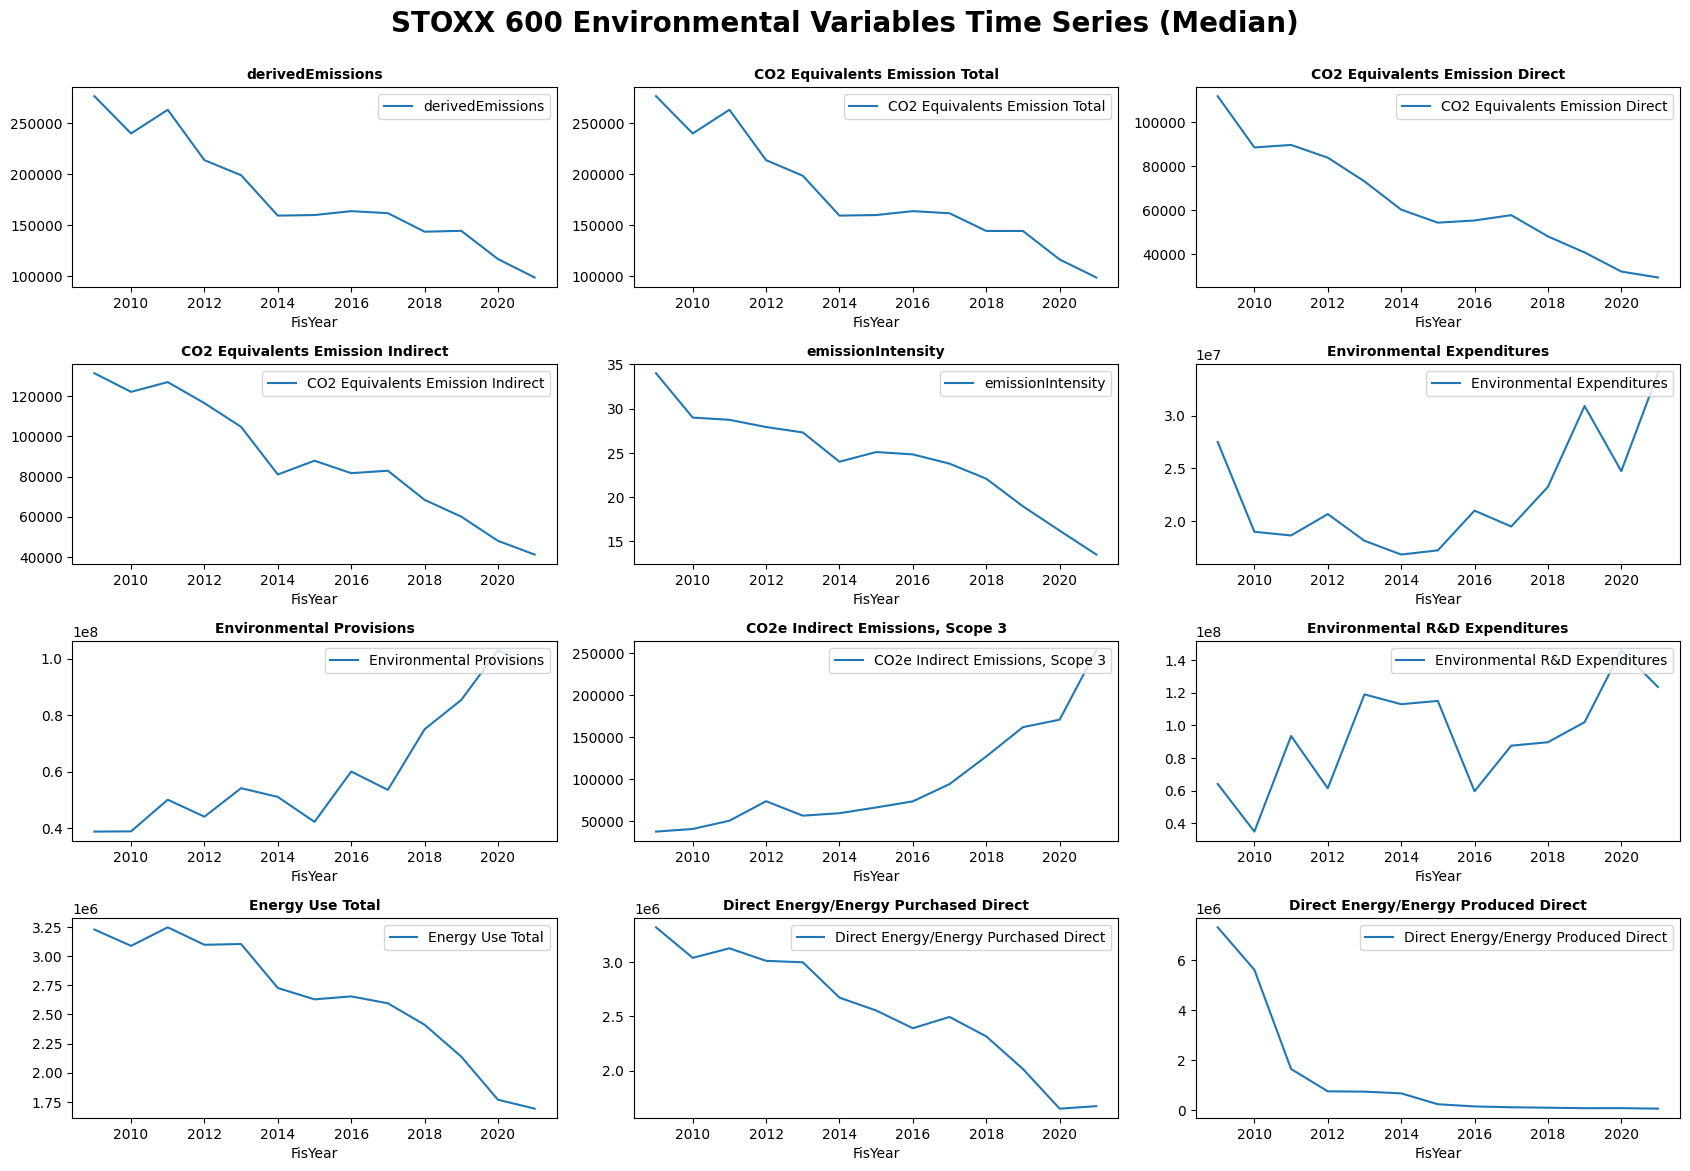

In [ ]:
plot_df_variables(data = es600  .copy(),variables = es600.columns[10:22], aggfunc = "median", title = "STOXX 600 Environmental Variables Time Series (Median)")

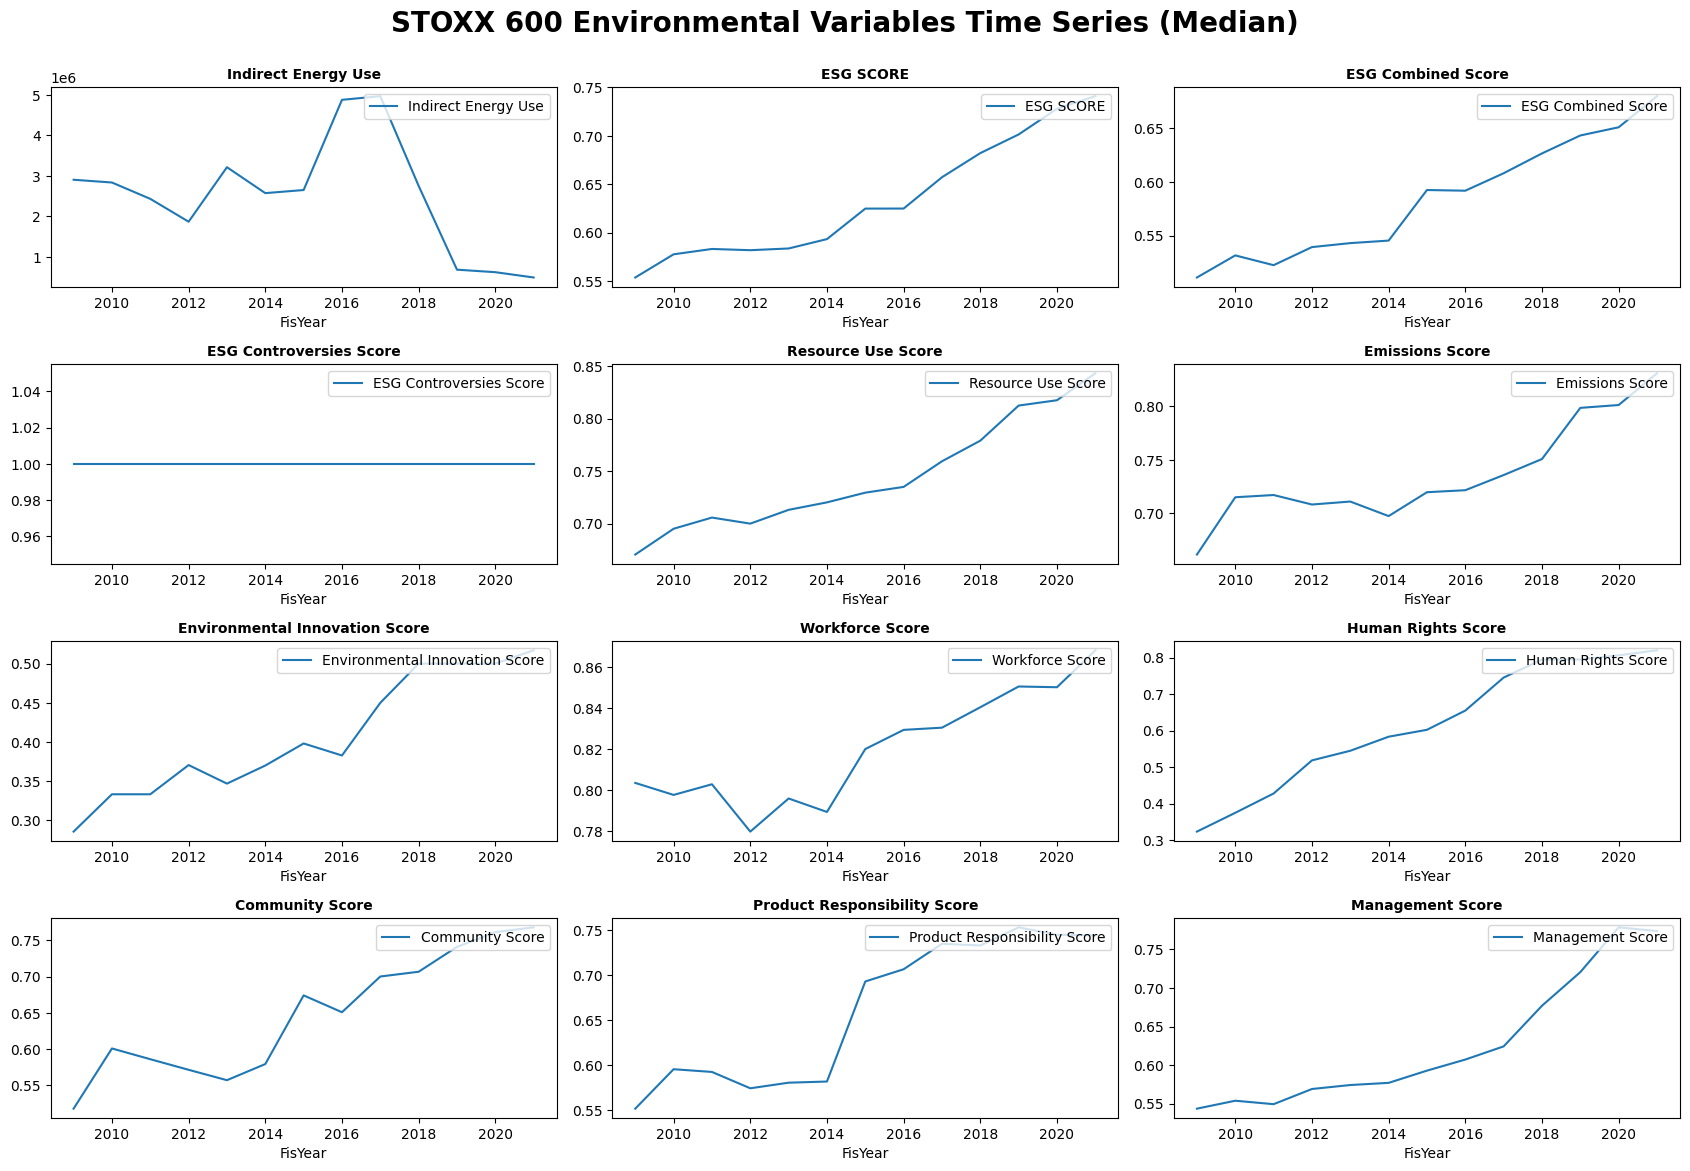

In [ ]:
plot_df_variables(data = es600.copy(),variables = es600.columns[22:34], aggfunc = "median", title = "STOXX 600 Environmental Variables Time Series (Median)")

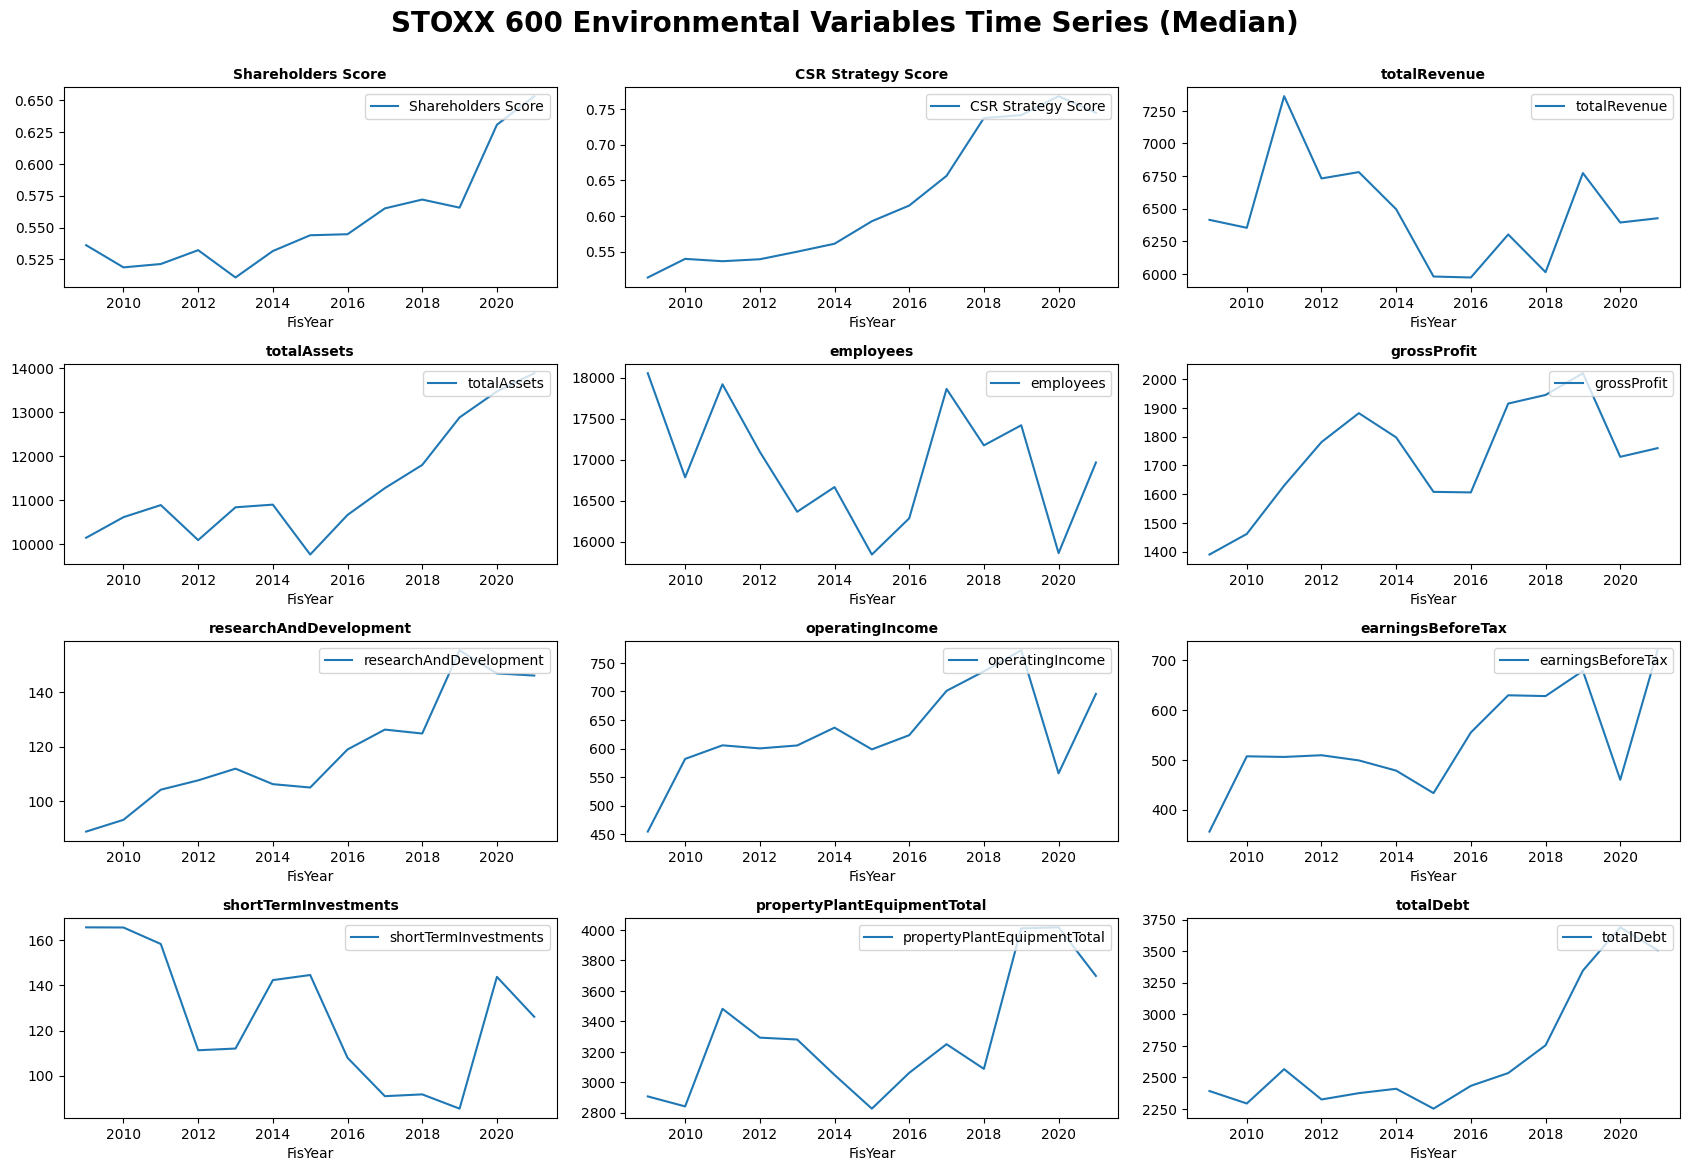

In [ ]:
plot_df_variables(data = es600  .copy(),variables = es600.columns[34:46], aggfunc = "median", title = "STOXX 600 Environmental Variables Time Series (Median)")

In [ ]:
es600.columns.to_list()

['OrgId',
 'econId',
 'econIdDesc',
 'OrgName_x',
 'FisYear',
 'Id_A4',
 'OrgName_y',
 'BusTRBCId',
 'Emission Reduction Processes/Policy Emissions Reduction',
 'Emission Reduction Objectives/Targets Emissions Reduction',
 'derivedEmissions',
 'CO2 Equivalents Emission Total',
 'CO2 Equivalents Emission Direct',
 'CO2 Equivalents Emission Indirect',
 'emissionIntensity',
 'Environmental Expenditures',
 'Environmental Provisions',
 'CO2e Indirect Emissions, Scope 3',
 'Environmental R&D Expenditures',
 'Energy Use Total',
 'Direct Energy/Energy Purchased Direct',
 'Direct Energy/Energy Produced Direct',
 'Indirect Energy Use',
 'ESG SCORE',
 'ESG Combined Score',
 'ESG Controversies Score',
 'Resource Use Score',
 'Emissions Score',
 'Environmental Innovation Score',
 'Workforce Score',
 'Human Rights Score',
 'Community Score',
 'Product Responsibility Score',
 'Management Score',
 'Shareholders Score',
 'CSR Strategy Score',
 'totalRevenue',
 'totalAssets',
 'employees',
 'grossProfit